## Observations of Pymaceuticals

* Capomulin and Ramicane look to be the best preformers of the trial along with being the only trials with the most amount of mice.

* The Capomulin drug looks to work very well but, not as well as Ramicane which has a slightly bettwe average.

* Infubinol had an outlier which seemed to indicate that the drug worked for a small percentage of mice. 

## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

pharma = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
pharma

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
tot_mice = len(pharma["Mouse ID"].unique())
tot_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 

# duplicateDFRow = pharma[pharma.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
# duplicateDFRow

# pharma.loc[pharma.duplicated(['Mouse ID', 'Timepoint'], keep=False), :]

duplicate_mouse_ids = pharma.loc[pharma.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# pharma_clean = pharma.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)
# duplicateDFRow1 = pharma_clean[pharma_clean.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
# duplicateDFRow1

# clean_pharma = pharma.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
# clean_pharma

clean_pharma = pharma[pharma['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_pharma

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.

tot_mice_clean = len(clean_pharma["Mouse ID"].unique())
tot_mice_clean

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug
# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_mean = clean_pharma.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drug_median = clean_pharma.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drug_variance = clean_pharma.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drug_std = clean_pharma.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drug_sem = clean_pharma.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_table = pd.DataFrame({
                                "Mean": drug_mean, 
                                "Median":drug_median, 
                                "Variance":drug_variance, 
                                "Standard Deviation": drug_std, 
                                "SEM": drug_sem
                             })
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summary_table_clean = clean_pharma.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

summary_table_clean.to_csv("Output/SummaryOfStats.csv", index=True, header=True)

summary_table_clean


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

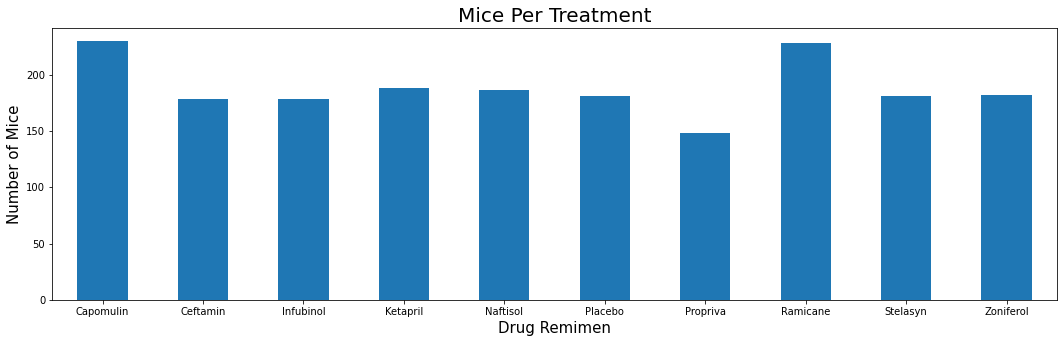

In [41]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice = clean_pharma.groupby(['Drug Regimen']).count()['Mouse ID']

chart_bar = mice.plot.bar(figsize=(18,5))
plt.xlabel('Drug Remimen', fontsize=15)
plt.xticks(rotation=0)
plt.ylabel("Number of Mice",fontsize=15)
plt.title('Mice Per Treatment', fontsize=20)
plt.show()

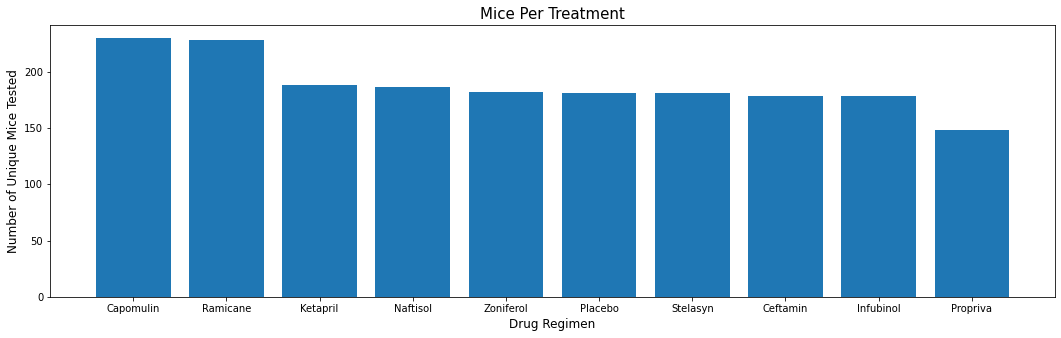

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_count = clean_pharma['Drug Regimen'].value_counts()

plt.subplots(figsize=(18,5))
plt.bar(drug_count.index.values, drug_count.values)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Unique Mice Tested', fontsize=12)
plt.title('Mice Per Treatment', fontsize=15)
plt.show()

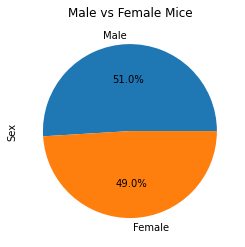

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

counts = clean_pharma.Sex.value_counts()
counts.plot(kind="pie",autopct='%.1f%%', title = "Male vs Female Mice")
plt.show()

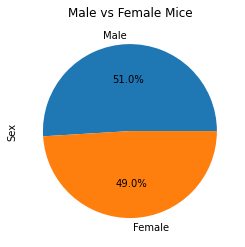

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = clean_pharma.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%.1f%%')
plt.title("Male vs Female Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_pharma.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_df = max_tumor.merge(clean_pharma,on=['Mouse ID','Timepoint'],how="left")
max_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
# Instructor provided similar code for us to reference

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = max_tumor_df.loc[max_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


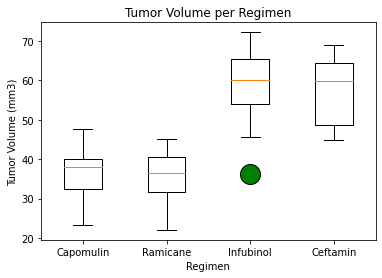

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

design = dict(marker='o', markerfacecolor='g', markersize = 20)
plt.boxplot(tumor_list, labels = treatments,flierprops=design)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Tumor Volume per Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Regimen")
plt.show()

## Line and Scatter Plots

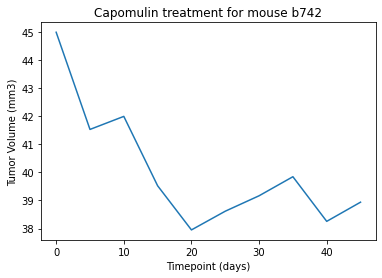

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_table = clean_pharma.loc[clean_pharma['Drug Regimen'] == "Capomulin"]
cap_table['Mouse ID'].unique()

onemouse = cap_table.loc[cap_table['Mouse ID']== 'b742']
onemouse

plt.plot(onemouse['Timepoint'],onemouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment for mouse b742')
plt.show() 

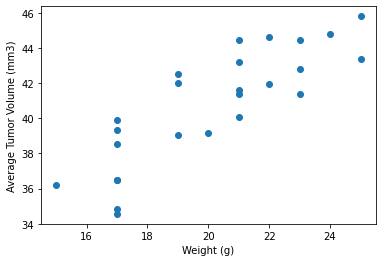

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_table = clean_pharma.loc[clean_pharma['Drug Regimen'] == "Capomulin"]
cap_avg = cap_table.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


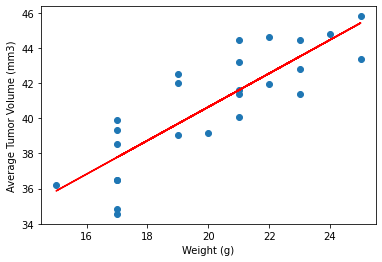

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])

y_values = cap_avg['Weight (g)']*model[0]+model[1]
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [38]:
# END